# Crime data from 2014

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2014'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# Of             7613 non-null float64
# Of Offenses    52214 non-null float64
# Offenses       10319 non-null float64
# offenses       51604 non-null float64
Beat             121734 non-null object
Block Range      69989 non-null object
BlockRange       51604 non-null object
Date             121746 non-null datetime64[ns]
Hour             121750 non-null int64
Offense Type     121750 non-null object
Premise          92169 non-null object
Street Name      70146 non-null object
StreetName       51604 non-null object
Suffix           121750 non-null object
Type             121750 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


In [7]:
df.head(2)

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,2014-04-28,5,Murder,13R,MCKINNEY,NaN,-,ST


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of             114137
# Of Offenses     69536
# Offenses       111431
# offenses        70146
Beat                 16
Block Range       51761
BlockRange        70146
Date                  4
Hour                  0
Offense Type          0
Premise           29581
Street Name       51604
StreetName        70146
Suffix                0
Type                  0
dtype: int64

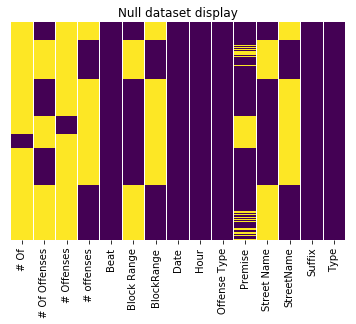

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- joining similar columns
- renaming

In [10]:
# Map the lowering function to all column names
#df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,2014-04-28,5,Murder,13R,MCKINNEY,NaN,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,2014-04-27,18,Murder,20A,HILLMONT,NaN,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,2014-04-09,18,Murder,20A,RENWICK,NaN,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,2014-04-24,3,Murder,03B,RICHMOND,NaN,-,AVE


## combine multiple columns into similar

In [12]:
df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
                              df['# Of Offenses'].dropna(),
                              df['# offenses'].dropna(),
                              df['# Offenses'].dropna()]).reindex_like(df)

In [13]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,8500-8599,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,MARTIN LUTHER KING,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,3600-3699,2014-04-28,5,Murder,13R,MCKINNEY,MCKINNEY,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,7400-7499,2014-04-27,18,Murder,20A,HILLMONT,HILLMONT,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,5400-5499,2014-04-09,18,Murder,20A,RENWICK,RENWICK,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,9300-9399,2014-04-24,3,Murder,03B,RICHMOND,RICHMOND,-,AVE


In [14]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

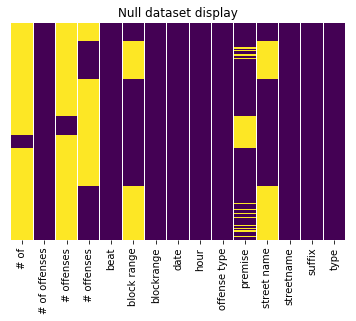

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [16]:
df.head(2)

,# of,# of offenses,# offenses,# offenses,beat,block range,blockrange,date,hour,offense type,premise,street name,streetname,suffix,type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,8500-8599,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,MARTIN LUTHER KING,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,3600-3699,2014-04-28,5,Murder,13R,MCKINNEY,MCKINNEY,-,ST


In [17]:
df.rename(columns={
    '# of offenses': 'num_offenses',
     'offense type': 'offense_type',
    'blockrange': 'block_range',
    'streetname': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# of            7613 non-null float64
num_offenses    121750 non-null float64
# offenses      10319 non-null float64
# offenses      51604 non-null float64
beat            121734 non-null object
block range     69989 non-null object
block_range     121593 non-null object
date            121746 non-null datetime64[ns]
hour            121750 non-null int64
offense_type    121750 non-null object
premise         92169 non-null object
street name     70146 non-null object
street_name     121750 non-null object
suffix          121750 non-null object
type            121750 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


In [18]:
df.head()

,# of,num_offenses,# offenses,# offenses,beat,block range,block_range,date,hour,offense_type,premise,street name,street_name,suffix,type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,8500-8599,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,MARTIN LUTHER KING,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,3600-3699,2014-04-28,5,Murder,13R,MCKINNEY,MCKINNEY,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,7400-7499,2014-04-27,18,Murder,20A,HILLMONT,HILLMONT,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,5400-5499,2014-04-09,18,Murder,20A,RENWICK,RENWICK,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,9300-9399,2014-04-24,3,Murder,03B,RICHMOND,RICHMOND,-,AVE


## Drop columns

In [19]:
list(df.columns)

['# of',
 'num_offenses',
 '# offenses',
 '# offenses',
 'beat',
 'block range',
 'block_range',
 'date',
 'hour',
 'offense_type',
 'premise',
 'street name',
 'street_name',
 'suffix',
 'type']

In [20]:
df = df[['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 8 columns):
date            121746 non-null datetime64[ns]
hour            121750 non-null int64
beat            121734 non-null object
offense_type    121750 non-null object
block_range     121593 non-null object
street_name     121750 non-null object
premise         92169 non-null object
num_offenses    121750 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 7.4+ MB


In [22]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2014-04-19,17,14D30,Murder,8500-8599,MARTIN LUTHER KING,18D,1.0
1,2014-04-28,5,10H20,Murder,3600-3699,MCKINNEY,13R,1.0
2,2014-04-27,18,5F30,Murder,7400-7499,HILLMONT,20A,3.0
3,2014-04-09,18,17E10,Murder,5400-5499,RENWICK,20A,2.0
4,2014-04-24,3,18F50,Murder,9300-9399,RICHMOND,03B,1.0


## Premise

In [23]:
premise_data = pd.read_csv(premise_dataset)
#premise_data.columns = map(str.lower, premise_data.columns)
premise_data.columns = ['premise','premise_description']
premise_data.head()

,premise,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [24]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2014-04-19,17,14D30,Murder,8500-8599,MARTIN LUTHER KING,18D,1.0
1,2014-04-28,5,10H20,Murder,3600-3699,MCKINNEY,13R,1.0
2,2014-04-27,18,5F30,Murder,7400-7499,HILLMONT,20A,3.0
3,2014-04-09,18,17E10,Murder,5400-5499,RENWICK,20A,2.0
4,2014-04-24,3,18F50,Murder,9300-9399,RICHMOND,03B,1.0


In [25]:
df = pd.merge(df, premise_data, on='premise', how='outer')

In [26]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,premise_description
0,2014-04-19,17.0,14D30,Murder,8500-8599,MARTIN LUTHER KING,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,2.0,3B10,Robbery,4400-4499,SHERWOOD,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,12.0,16E30,Theft,5300-5399,OREM,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,11.0,13D20,Theft,6600-6699,TELEPHONE,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,15.0,8C50,Theft,8800-8899,TIDWELL,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT


## Display null values

In [27]:
df.apply(lambda x: sum(x.isnull()))

date                       8
hour                       4
beat                      20
offense_type               4
block_range              161
street_name                4
premise                29581
num_offenses               4
premise_description    70055
dtype: int64

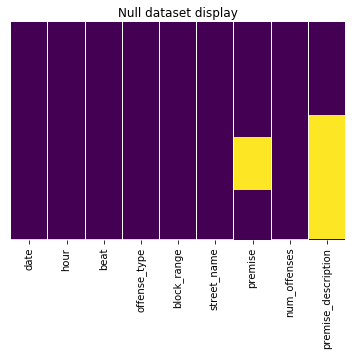

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Investigate

In [29]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,premise_description
121744,2014-10-25,17.0,4F10,Theft,1200-1299,CONRAD SAUER,"Vacant Church, Synagogue, or Temple",1.0,NaN
121745,2014-10-13,12.0,7C30,Burglary,2700-2799,BERRY,"Vacant Church, Synagogue, or Temple",1.0,NaN
121746,2014-09-25,9.0,18F20,Theft,700-799,SAGE,"Vacant Church, Synagogue, or Temple",1.0,NaN
121747,2014-10-16,4.0,10H30,Theft,1800-1899,EDMUNDSON,Vacant Industrial or Manufacturing Blding,1.0,NaN
121748,2014-09-09,7.0,8C30,Theft,8000-8099,LOOP,Vacant Industrial or Manufacturing Blding,1.0,NaN
121749,2014-10-29,15.0,6B10,Theft,400-499,LITTLE YORK,Vacant Bank,1.0,NaN
121750,NaT,NaN,NaN,NaN,NaN,NaN,02V,NaN,VACANT BANK
121751,NaT,NaN,NaN,NaN,NaN,NaN,09V,NaN,VACANT HOSPITAL
121752,NaT,NaN,NaN,NaN,NaN,NaN,13C,NaN,CONTRA-FLOW/HOV
121753,NaT,NaN,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## Replace null values from premise_description from column premise

In [30]:
df.premise_description.fillna(df.premise, inplace=True)

In [31]:
df.apply(lambda x: sum(x.isnull()))

date                       8
hour                       4
beat                      20
offense_type               4
block_range              161
street_name                4
premise                29581
num_offenses               4
premise_description    29581
dtype: int64

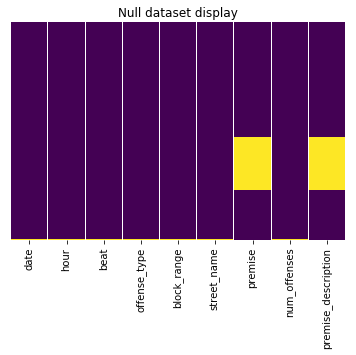

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [33]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,premise_description
94307,2014-09-17,20.0,UNK,Theft,8000-8099,GESSNER,NaN,1.0,NaN
94308,2014-09-27,2.0,UNK,Aggravated Assault,700-799,FM 1960,NaN,1.0,NaN
94309,2014-09-07,11.0,UNK,Theft,500-599,MARSHALL,NaN,1.0,NaN
94310,2014-09-04,15.0,UNK,Theft,9400-9499,FM 1960,NaN,1.0,NaN
94311,2014-09-14,19.0,UNK,Theft,12600-12699,LAKE HOUSTON,NaN,1.0,NaN
94312,2014-09-28,2.0,UNK,Theft,7900-7999,GESSNER,NaN,1.0,NaN
121750,NaT,NaN,NaN,NaN,NaN,NaN,02V,NaN,VACANT BANK
121751,NaT,NaN,NaN,NaN,NaN,NaN,09V,NaN,VACANT HOSPITAL
121752,NaT,NaN,NaN,NaN,NaN,NaN,13C,NaN,CONTRA-FLOW/HOV
121753,NaT,NaN,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## Drop premise column

In [34]:
df.drop(['premise'],axis=1, inplace=True)

## Rename premise_description to premise

In [35]:
df.rename(columns={
    'premise_description': 'premise',
}, inplace=True)

In [36]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,num_offenses,premise
0,2014-04-19,17.0,14D30,Murder,8500-8599,MARTIN LUTHER KING,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,2.0,3B10,Robbery,4400-4499,SHERWOOD,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,12.0,16E30,Theft,5300-5399,OREM,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,11.0,13D20,Theft,6600-6699,TELEPHONE,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,15.0,8C50,Theft,8800-8899,TIDWELL,1.0,LAUNDRY/DRY CLEANERS PARKING LOT


# Null values

In [37]:
df.apply(lambda x: sum(x.isnull()))

date                8
hour                4
beat               20
offense_type        4
block_range       161
street_name         4
num_offenses        4
premise         29581
dtype: int64

In [38]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,num_offenses,premise
94307,2014-09-17,20.0,UNK,Theft,8000-8099,GESSNER,1.0,NaN
94308,2014-09-27,2.0,UNK,Aggravated Assault,700-799,FM 1960,1.0,NaN
94309,2014-09-07,11.0,UNK,Theft,500-599,MARSHALL,1.0,NaN
94310,2014-09-04,15.0,UNK,Theft,9400-9499,FM 1960,1.0,NaN
94311,2014-09-14,19.0,UNK,Theft,12600-12699,LAKE HOUSTON,1.0,NaN
94312,2014-09-28,2.0,UNK,Theft,7900-7999,GESSNER,1.0,NaN
121750,NaT,NaN,NaN,NaN,NaN,NaN,NaN,VACANT BANK
121751,NaT,NaN,NaN,NaN,NaN,NaN,NaN,VACANT HOSPITAL
121752,NaT,NaN,NaN,NaN,NaN,NaN,NaN,CONTRA-FLOW/HOV
121753,NaT,NaN,NaN,NaN,NaN,NaN,NaN,VACANT JAIL/PRISON


### Drop rows with more than 3 null values

In [39]:
df.dropna(thresh=3,inplace=True)

In [40]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,num_offenses,premise
94303,2014-09-28,4.0,UNK,Aggravated Assault,12700-12799,NORTH,1.0,NaN
94304,2014-09-15,9.0,UNK,Theft,3200-3299,MAIN,1.0,NaN
94305,2014-09-04,2.0,UNK,Burglary,8700-8799,GESSNER,1.0,NaN
94306,2014-09-01,10.0,UNK,Theft,3200-3299,SH 6,1.0,NaN
94307,2014-09-17,20.0,UNK,Theft,8000-8099,GESSNER,1.0,NaN
94308,2014-09-27,2.0,UNK,Aggravated Assault,700-799,FM 1960,1.0,NaN
94309,2014-09-07,11.0,UNK,Theft,500-599,MARSHALL,1.0,NaN
94310,2014-09-04,15.0,UNK,Theft,9400-9499,FM 1960,1.0,NaN
94311,2014-09-14,19.0,UNK,Theft,12600-12699,LAKE HOUSTON,1.0,NaN
94312,2014-09-28,2.0,UNK,Theft,7900-7999,GESSNER,1.0,NaN


### Replace null values on premise_code to 'none'

In [41]:
df.premise.fillna('UNK',inplace=True)

In [42]:
df.apply(lambda x: sum(x.isnull()))

date              4
hour              0
beat             16
offense_type      0
block_range     157
street_name       0
num_offenses      0
premise           0
dtype: int64

# Inspect each column

## `num_offenses`

In [43]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,num_offenses,premise
0,2014-04-19,17.0,14D30,Murder,8500-8599,MARTIN LUTHER KING,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,2.0,3B10,Robbery,4400-4499,SHERWOOD,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,12.0,16E30,Theft,5300-5399,OREM,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,11.0,13D20,Theft,6600-6699,TELEPHONE,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,15.0,8C50,Theft,8800-8899,TIDWELL,1.0,LAUNDRY/DRY CLEANERS PARKING LOT


In [44]:
df.num_offenses.value_counts(dropna=False)

1.0     119966
2.0       1560
3.0        176
4.0         27
5.0         11
6.0          7
7.0          1
12.0         1
29.0         1
Name: num_offenses, dtype: int64

In [45]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [46]:
df.num_offenses = df.num_offenses.astype('int')

In [47]:
df.num_offenses.dtype

dtype('int64')

In [48]:
df.num_offenses.value_counts(dropna=False)

1     119966
2       1560
3        176
4         27
5         11
6          7
29         1
12         1
7          1
Name: num_offenses, dtype: int64

## `beat`

In [49]:
len(df.beat.value_counts(dropna='False'))

234

In [50]:
df.beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [51]:
df.beat = df.beat.str.strip()

In [52]:
len(df.beat.unique())

235

## `block_range`

In [53]:
len(df.block_range.unique())

251

In [54]:
df.block_range = df.block_range.str.strip()

In [55]:
len(df.block_range.unique())

251

## `date`

In [56]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [57]:
df.hour.value_counts(dropna=False)

18.0    7073
15.0    7068
16.0    7006
12.0    6865
17.0    6841
14.0    6637
19.0    6515
13.0    6301
20.0    6206
10.0    6144
11.0    6102
9.0     5743
21.0    5560
8.0     5324
22.0    5295
0.0     4712
7.0     4308
23.0    4305
6.0     2874
2.0     2583
1.0     2559
3.0     2039
5.0     1970
4.0     1719
24.0       1
Name: hour, dtype: int64

In [58]:
df.hour.dtype

dtype('float64')

## Change dtype 

In [59]:
df.hour = df.hour.astype('int')

In [60]:
df.hour.dtype

dtype('int64')

In [61]:
df.hour.value_counts(dropna=False)

18    7073
15    7068
16    7006
12    6865
17    6841
14    6637
19    6515
13    6301
20    6206
10    6144
11    6102
9     5743
21    5560
8     5324
22    5295
0     4712
7     4308
23    4305
6     2874
2     2583
1     2559
3     2039
5     1970
4     1719
24       1
Name: hour, dtype: int64

## `offense_type`

In [62]:
df.offense_type.value_counts(dropna=False)

Theft                 66675
Burglary              21145
Auto Theft            13454
Robbery                9998
Aggravated Assault     9460
Rape                    788
Murder                  230
Name: offense_type, dtype: int64

In [63]:
df.offense_type.unique()

array(['Murder', 'Robbery', 'Theft', 'Aggravated Assault', 'Burglary',
       'Auto Theft', 'Rape'], dtype=object)

## `street_name`

In [64]:
len(df.street_name.value_counts(dropna=False))

7970

In [65]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER    3458
NORTH         1790
GULF          1756
GESSNER       1680
RICHMOND      1628
KATY          1265
BELLAIRE      1225
SOUTHWEST     1207
MAIN          1203
BISSONNET     1194
Name: street_name, dtype: int64

In [66]:
df.street_name.unique()

array(['MARTIN LUTHER KING', 'SHERWOOD', 'OREM', ..., 'BEAR RAM',
       'CHARLIE', 'CALVINS'], dtype=object)

In [67]:
df.street_name = df.street_name.str.strip()  # no need

In [68]:
len(df.street_name.value_counts(dropna=False))

7966

In [69]:
df.street_name = df.street_name.str.upper()

In [70]:
len(df.street_name.value_counts(dropna=False))

7966

## Organiaze columns

In [71]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,num_offenses,premise
0,2014-04-19,17,14D30,Murder,8500-8599,MARTIN LUTHER KING,1,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,2,3B10,Robbery,4400-4499,SHERWOOD,1,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,12,16E30,Theft,5300-5399,OREM,1,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,11,13D20,Theft,6600-6699,TELEPHONE,1,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,15,8C50,Theft,8800-8899,TIDWELL,1,LAUNDRY/DRY CLEANERS PARKING LOT


In [72]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']

In [73]:
df = df.reindex(columns=cols)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121750 entries, 0 to 121749
Data columns (total 8 columns):
date            121746 non-null datetime64[ns]
hour            121750 non-null int64
beat            121734 non-null object
offense_type    121750 non-null object
block_range     121593 non-null object
street_name     121726 non-null object
premise         121750 non-null object
num_offenses    121750 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.4+ MB


In [75]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2014-04-19,17,14D30,Murder,8500-8599,MARTIN LUTHER KING,LAUNDRY/DRY CLEANERS PARKING LOT,1
1,2014-04-13,2,3B10,Robbery,4400-4499,SHERWOOD,LAUNDRY/DRY CLEANERS PARKING LOT,1
2,2014-04-11,12,16E30,Theft,5300-5399,OREM,LAUNDRY/DRY CLEANERS PARKING LOT,1
3,2014-04-12,11,13D20,Theft,6600-6699,TELEPHONE,LAUNDRY/DRY CLEANERS PARKING LOT,1
4,2014-04-13,15,8C50,Theft,8800-8899,TIDWELL,LAUNDRY/DRY CLEANERS PARKING LOT,1


## Null values

In [85]:
df.apply(lambda x: sum(x.isnull()))

date              4
hour              0
beat             16
offense_type      0
block_range     154
street_name       0
premise           0
num_offenses      0
dtype: int64

In [86]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
86962,2014-06-26,18,1A10,Theft,NaN,ALMEDA RD / SOUTHMORE BLVD,UNK,1
87071,2014-06-15,13,1A10,Theft,NaN,ALABAMA / SHEPHERD DR,UNK,1
87105,2014-06-25,20,1A10,Theft,NaN,AIRPORT BLVD / FONDREN RD,UNK,1
87135,2014-05-29,12,1A10,Theft,NaN,AIRLINE DR / WEST,UNK,1
87179,2014-06-25,9,20G50,Theft,NaN,800 TOWN AND COUNTRY (PV BLVD,UNK,1
87180,2014-06-28,9,20G50,Theft,NaN,800 TOWN AND COUNTRY (PV BLVD,UNK,1
87188,2014-06-28,23,17E40,Auto Theft,NaN,6334CREEKBEND,UNK,1
87224,2014-06-03,17,1A10,Theft,NaN,26TH ST / BEVIS ST,UNK,1
87238,2014-06-19,1,8C10,Burglary,NaN,2 DENMARK,UNK,1
87250,2014-06-12,23,3B40,Robbery,NaN,1200 EAST 40TH 1,UNK,1


## Drop street name with null values

In [84]:
df.dropna(subset=['street_name'],inplace=True)

In [87]:
df.apply(lambda x: sum(x.isnull()))

date              4
hour              0
beat             16
offense_type      0
block_range     154
street_name       0
premise           0
num_offenses      0
dtype: int64

## Replace beat & blockrange with UNK

In [88]:
values = {'block_range': 'UNK', 'beat': 'UNK', 'date': 'UNK'}
df.fillna(value=values,inplace=True)

In [89]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    0
block_range     0
street_name     0
premise         0
num_offenses    0
dtype: int64

## Save clean data

In [90]:
data_directory_saves

'../data/clean_data/'

In [91]:
df.to_csv(data_directory_saves+'crime_2014.csv')